PROJETO - SÉRIES TEMPORAIS

Entender a Tendência, Sazonalidade e Ruído

Exploração inicial
Decomposição
Testar se a série é estacionária (adfuller)
Fazer a diferenciação caso não seja estacionária
Graficos e autocorrelation  acf
Arima e Autoarima


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from functions import *

In [3]:
df = pd.read_csv("SalmonandSeaTrout.csv") 
df1 = df.groupby(['Year', 'MonthNumber']).sum()
df1.reset_index(inplace=True)
df1['Datas'] = df1['Year'].astype(str) + '-' + df1['MonthNumber'].astype(str)
df1.loc[:,'Datas'] = pd.to_datetime(df1['Datas'],  yearfirst= True)
df1.set_index('Datas', inplace=True)
primeiro_mes = df1.index.min()
ultimo_mes = df1.index.max()
todos_meses = pd.date_range(start=primeiro_mes, end=ultimo_mes, freq='MS')
df_referencia = pd.DataFrame({'Data': todos_meses})
df_referencia.set_index('Data', inplace=True)
df = df1.combine_first(df_referencia)
df.fillna(0, inplace=True)
df['MonthNumber'] = df_referencia.index.month
df['Year'] = df_referencia.index.year
df = df[['Year','MonthNumber','Salmon','SalmonWeight','SeaTrout','SeaTroutWeight', 'Farmed']]
df0 = df[df['Year']<1983]
df = df[df['Year']<1980]

df.head(13)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Year,MonthNumber,Salmon,SalmonWeight,SeaTrout,SeaTroutWeight,Farmed
1952-02-01,1952,2,26.733,145.730283,0.598,9.544724,0.0
1952-03-01,1952,3,24.493,184.315819,1.219,23.048463,0.0
1952-04-01,1952,4,34.886,290.013496,5.460,42.206117,0.0
1952-05-01,1952,5,41.166,392.583903,23.067,77.572104,0.0
1952-06-01,1952,6,36.096,423.018922,42.653,80.644748,0.0
1952-07-01,1952,7,25.868,450.705496,30.527,82.540619,0.0
1952-08-01,1952,8,9.762,400.939891,6.578,57.893452,0.0
1952-09-01,1952,9,0.886,68.688526,1.442,7.848550,0.0
1952-10-01,1952,10,0.000,0.000000,0.000,0.000000,0.0
1952-11-01,1952,11,0.000,0.000000,0.000,0.000000,0.0


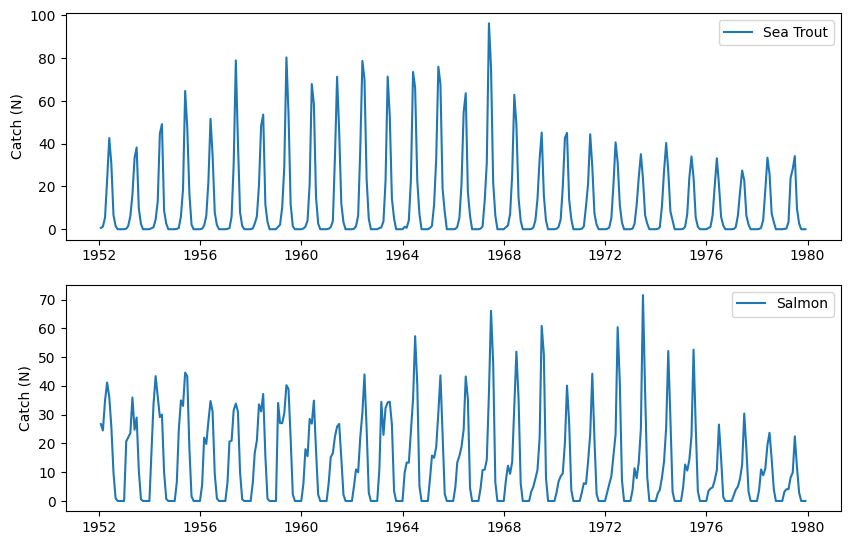

In [4]:

plt.figure(figsize=(10, 10))

# Primeiro subplot
plt.subplot(3, 1, 1)  # (linhas, colunas, índice)
plt.plot(df['SeaTrout'], label='Sea Trout')
plt.ylabel('Catch (N)')
plt.legend()

# Segundo subplot
plt.subplot(3, 1, 2)  # (linhas, colunas, índice)
plt.plot(df['Salmon'], label='Salmon')
plt.ylabel('Catch (N)')
plt.legend()

# # Terceiro subplot
# plt.subplot(3, 1, 3)  # (linhas, colunas, índice)
# plt.plot(df['Farmed'], label='Farmed Fish')
# plt.legend()
# plt.ylabel('Catch (N)')
# plt.xlabel('Years')

plt.show()



Captura por mês

Text(0.5, 0, 'Month')

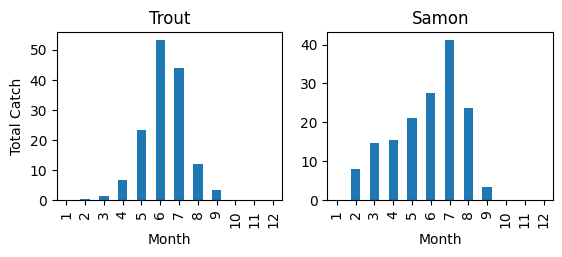

In [5]:
plt.subplot(2, 2, 1)  # (linhas, colunas, índice)
df.SeaTrout.groupby(df.index.month).mean().plot(kind='bar')
plt.title('Trout')
plt.xlabel('Month')
plt.ylabel('Total Catch')
plt.subplot(2, 2, 2)  # (linhas, colunas, índice)
df.Salmon.groupby(df.index.month).mean().plot(kind='bar')
plt.title('Samon')
plt.xlabel('Month')


AUTOCORRELAÇÃO

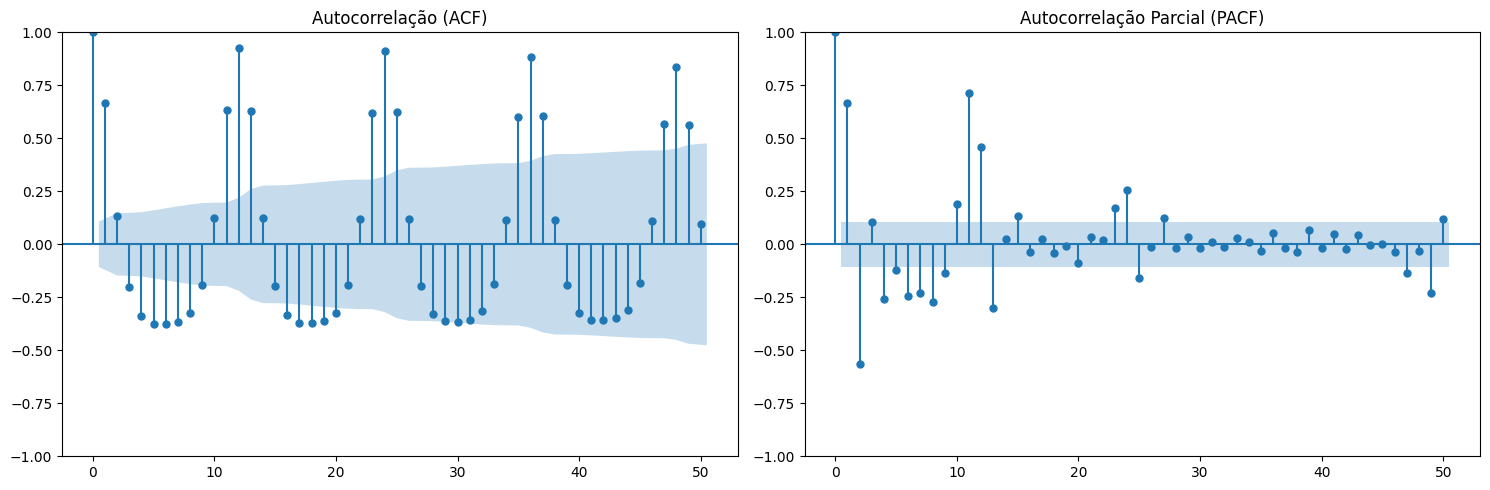

In [6]:
import statsmodels.graphics.tsaplots as tsaplots

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
tsaplots.plot_acf(df['SeaTrout'], lags=50, ax=ax1)
ax1.set_title('Autocorrelação (ACF)')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
tsaplots.plot_pacf(df['SeaTrout'], lags=50, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

TESTANDO SE É ESTACIONARIO

Augmented Dickey-Fuller Test (ADF)

In [7]:
adf(df.SeaTrout)
adf(df.Salmon)

O dado não é estacionário
O dado não é estacionário


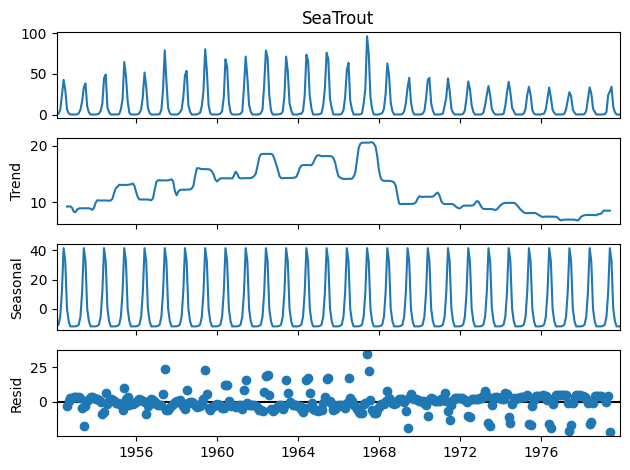

In [8]:
result = seasonal_decompose(df['SeaTrout'], period=12)
result.plot()
plt.show()

In [9]:
# STATIONARY
KPSS(df.SeaTrout)
KPSS(df.Salmon)



KPSS Statistic: 0.195464
p-value: 0.100000
Estacionária
KPSS Statistic: 0.460495
p-value: 0.051080
Estacionária


c:\Users\maria\Desktop\MeuGit\seriesTemporais\functions.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x, regression='c')


DIFERENCIAÇÃO

<Axes: >

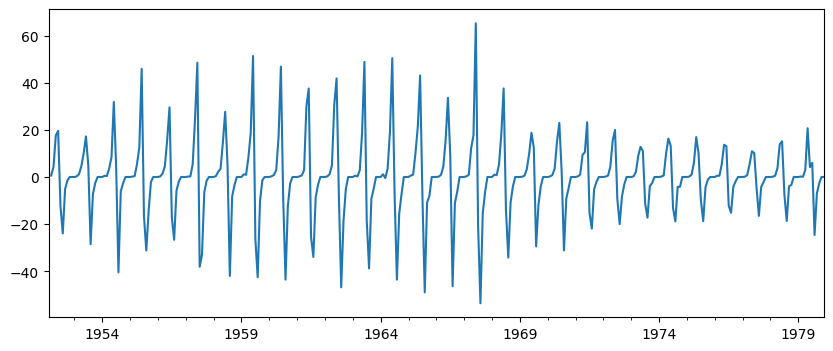

In [10]:
df['TroutDiff'] = df.SeaTrout.diff()
plt.figure(figsize=(10, 4))
df['TroutDiff'].plot()

In [11]:
adf(df['TroutDiff'][1:])
KPSS(df['TroutDiff'][1:])

O dado é estacionário, pvalue =  7.062391769780818e-21
KPSS Statistic: 0.059982
p-value: 0.100000
Estacionária


c:\Users\maria\Desktop\MeuGit\seriesTemporais\functions.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x, regression='c')


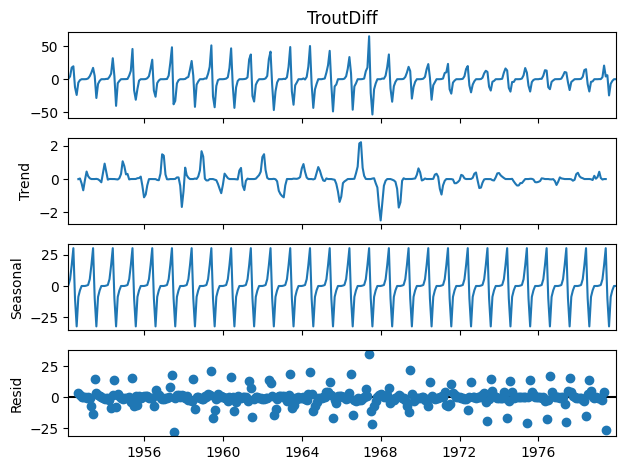

In [12]:
result = seasonal_decompose(df['TroutDiff'][1:], period=12)
result.plot()
plt.show()

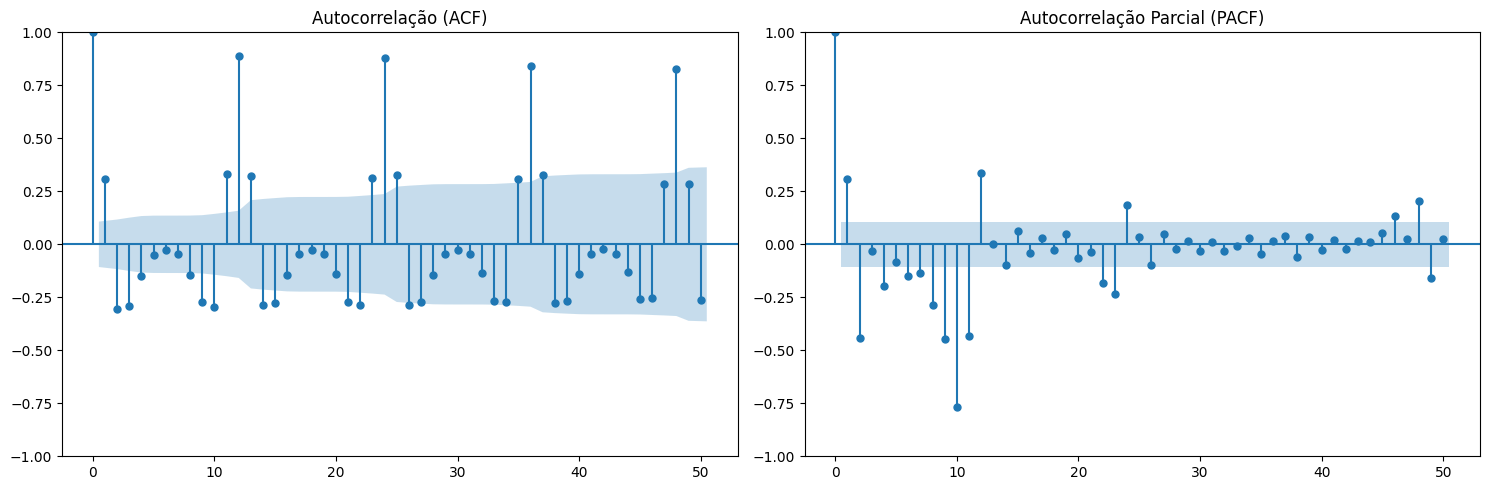

In [13]:
# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
tsaplots.plot_acf(df['TroutDiff'][1:], lags=50, ax=ax1)
ax1.set_title('Autocorrelação (ACF)')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
tsaplots.plot_pacf(df['TroutDiff'][1:], lags=50, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

DADO TRAIN E TEST

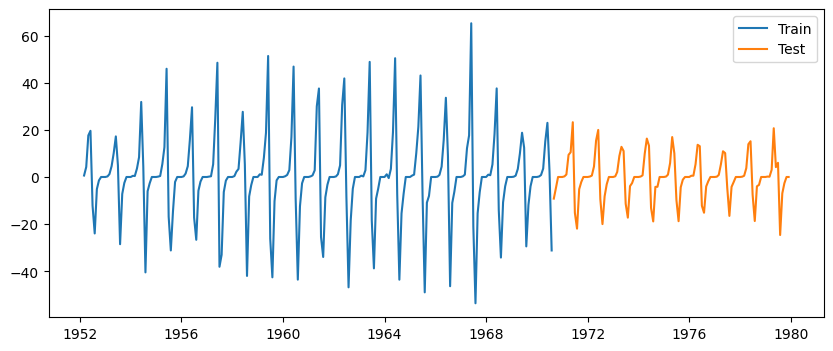

In [14]:
train_size = int(len(df.TroutDiff)*2/3)
train_set = df.TroutDiff[:train_size]
test_set = df.TroutDiff[train_size:]
plt.figure(figsize=(10, 4))
plt.plot(train_set, label="Train")
plt.plot(test_set, label="Test")
plt.legend()

MODELO AUTOREGRESSIVO (AR) - LinearRegression

In [15]:
from sklearn.linear_model import LinearRegression

dfmodel = pd.DataFrame({'TrainTrout': train_set, 'naiveTrain': train_set.shift(1)}).dropna()
X = dfmodel[['naiveTrain']]
y = dfmodel[['TrainTrout']]

reg = LinearRegression().fit(X,y)
prediction = reg.predict(X)


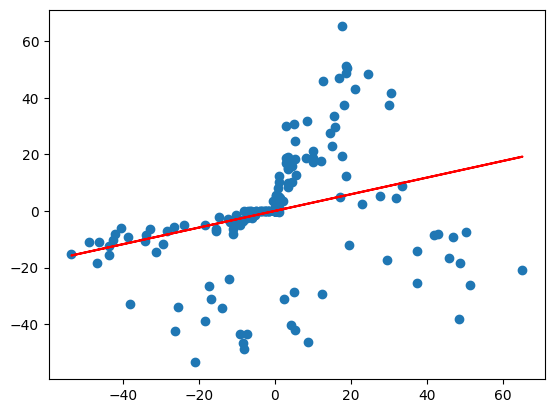

In [16]:
plt.scatter(X, y)
plt.plot(X, prediction, color='red')

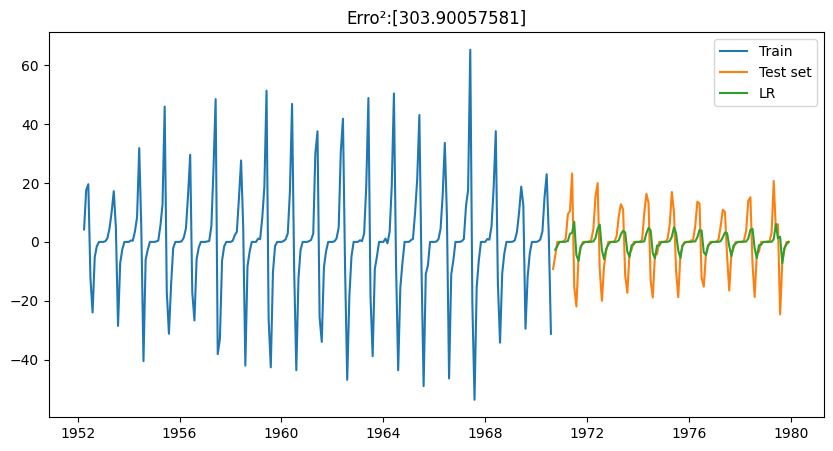

In [17]:
coef = reg.coef_[0][0]
pred_AR1 =  coef * test_set.shift(1)

erro = ((y-prediction)**2).mean()

plt.figure(figsize=(10, 5))
plt.plot(dfmodel['TrainTrout'], label="Train")
plt.plot(test_set, label='Test set')
plt.plot(pred_AR1, label="LR")
plt.title(f"Erro²:{erro.values}")
plt.legend()

plt.show()

AUTOREGRESSIVE A PARTIR DO statsmodel

In [18]:
train_size = int(len(df.SeaTrout)*2/3)
train_set = df.SeaTrout[:train_size]
test_set = df.SeaTrout[train_size:]
test_diff = test_set.diff(1)
dfmodel =  pd.DataFrame({'TrainTrout': train_set, 'TrainDiff':train_set.diff(1)}).dropna()

In [19]:
from statsmodels.tsa.ar_model import AutoReg 


dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='MS')
ar1 = AutoReg(dfmodel['TrainDiff'], lags=1).fit()
dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='MS')
ar2 = AutoReg(dfmodel['TrainDiff'], lags=2).fit()
prediction1 = ar1.predict()
prediction2 = ar2.predict()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              TrainDiff   No. Observations:                  222
Model:                     AutoReg(2)   Log Likelihood                -916.720
Method:               Conditional MLE   S.D. of innovations             15.611
Date:                Wed, 27 Mar 2024   AIC                           1841.440
Time:                        01:10:08   BIC                           1855.015
Sample:                    05-01-1952   HQIC                          1846.922
                         - 08-01-1970                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0396      1.053      0.038      0.970      -2.023       2.103
TrainDiff.L1     0.4275      0.061      7.043      0.000       0.309       0.546
TrainDiff.L2    -0.4523      0.061     -7.451      0.000      -0.571      -0.333
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4726           -1.4098j            1.4869           -0.1985
AR.2            0.4726           +1.4098j            1.4869            0.1985
-----------------------------------------------------------------------------
"""

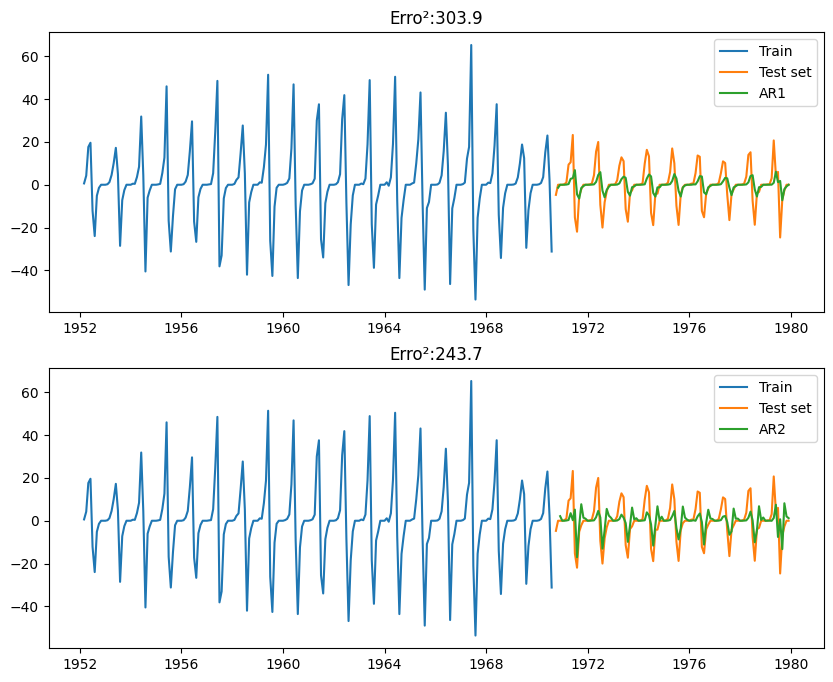

In [20]:
pred_AR1 = 0
for i, coef in enumerate(ar1.params[1:]):
    pred_AR1 +=  coef * test_diff.shift(i+1)
    
pred_AR2 = 0
for i, coef in enumerate(ar2.params[1:]):
    pred_AR2 +=  coef * test_diff.shift(i+1)
    
erro1 = round(((dfmodel.TrainDiff-prediction1)**2).mean(),2)
erro2 = round(((dfmodel.TrainDiff-prediction2)**2).mean(),2)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # (linhas, colunas, índice)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR1, label="AR1")
plt.title(f"Erro²:{erro1}")
plt.legend()

plt.subplot(2, 1, 2)  # (linhas, colunas, índice)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR2, label="AR2")
plt.title(f"Erro²:{erro2}")
plt.legend()


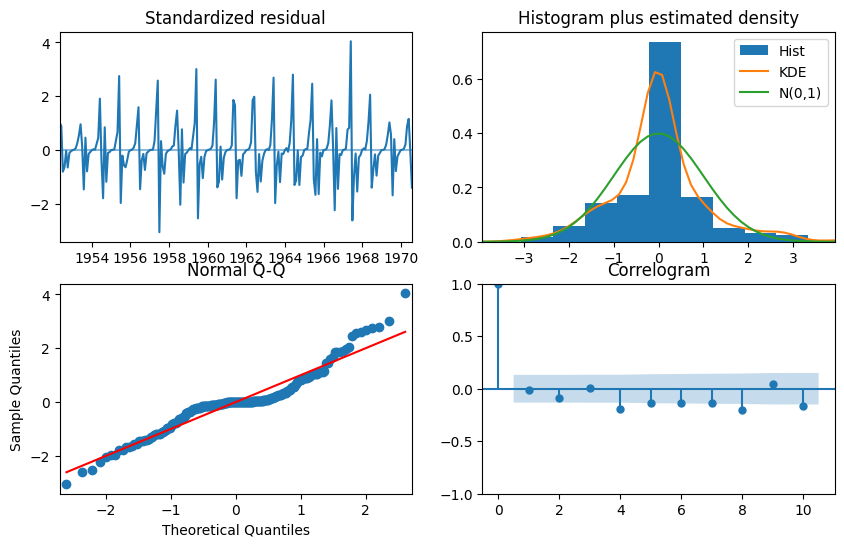

In [21]:
ar2.plot_diagnostics(figsize=(10,6));


#ARIMA
AR(p) = Efeito do momentum na série
I = integrated: uso das diferenças das informações
MA(p) = Efeito do ruído na série
p = periodos

In [22]:
from statsmodels.tsa.arima.model import ARIMA


arima_train = ARIMA(train_set,  order = (2,1,2)).fit()
arima = ARIMA(test_set, freq='MS', order = (2,1,2)).fit(arima_train.params)
pred_arima = arima.predict()
#arma.summary()


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


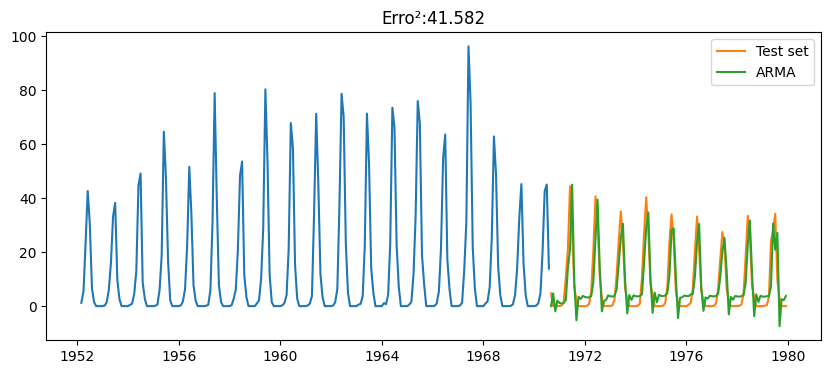

In [23]:
erro = round(((test_set - pred_arima)**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(dfmodel['TrainTrout'])
plt.plot(test_set, label='Test set')
plt.plot(pred_arima, label="ARMA")
plt.title(f"Erro²:{erro}")
plt.legend()

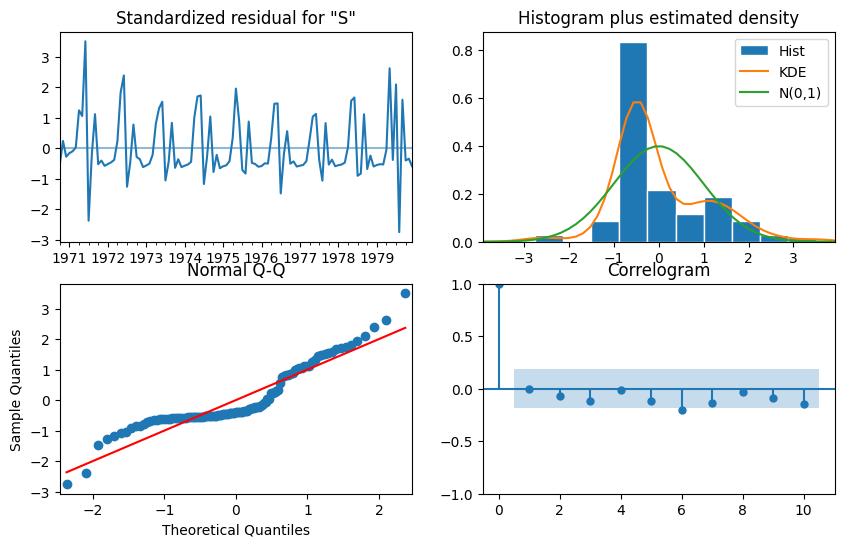

In [24]:
arima.plot_diagnostics(figsize=(10,6));


SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_train = SARIMAX(train_set, order = (2, 1, 2), seasonal_order = (2,1,2,12)).fit()
sarima = SARIMAX(test_set, order = (2, 1, 2), seasonal_order = (2,1,2,12)).fit(sarima_train.params)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs

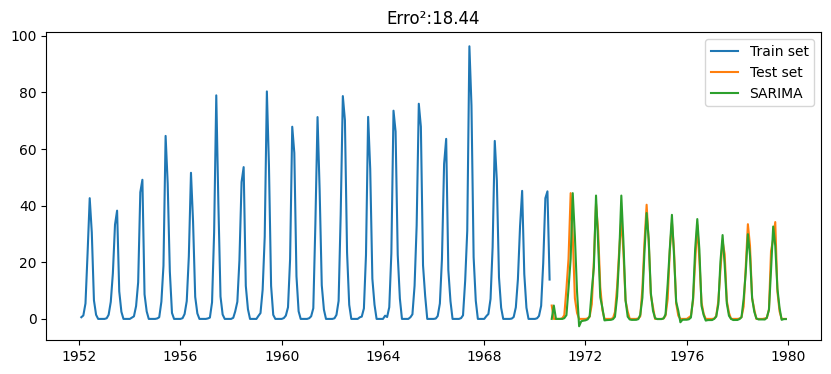

In [26]:
erro = round((sarima.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima.predict(typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()


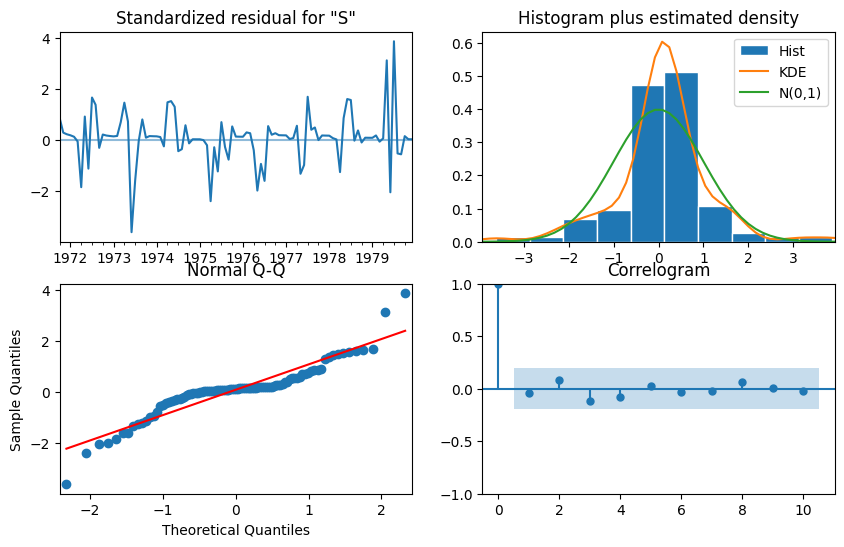

In [27]:
sarima.plot_diagnostics(figsize=(10,6));

AUTOARIMA

In [28]:
from pmdarima import auto_arima
import pandas as pd

# Suponha que você tenha um DataFrame df com a série temporal que deseja modelar
# e a série esteja na coluna 'serie_temporal'

# Ajustar o modelo AutoARIMA
modelo_autoarima = auto_arima(df.SeaTrout, seasonal=True, m=12, D=0)

# Resumo do modelo
print(modelo_autoarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  335
Model:             SARIMAX(3, 0, 2)x(2, 0, [1], 12)   Log Likelihood               -1020.940
Date:                              Wed, 27 Mar 2024   AIC                           2061.879
Time:                                      01:10:47   BIC                           2100.020
Sample:                                  02-01-1952   HQIC                          2077.085
                                       - 12-01-1979                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6010      0.670      0.896      0.370      -0.713       1.915
ar.L1         -1.31

In [29]:
modelo_autoarima.fit(train_set)

ARIMA(order=(3, 0, 2), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs

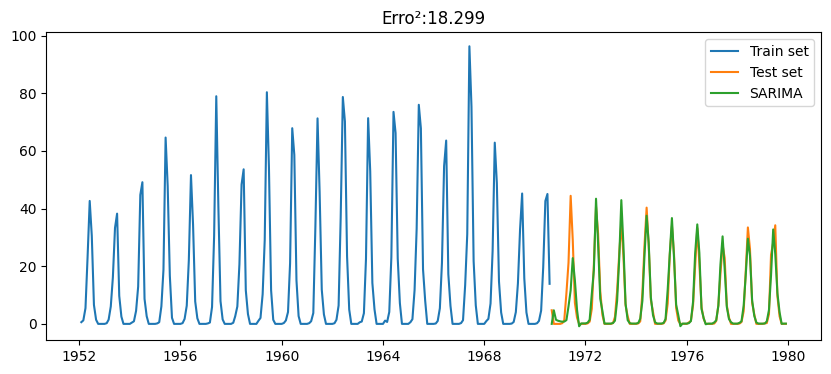

In [30]:
sarima_train = SARIMAX(train_set, order = (1, 1, 1), seasonal_order = (2,0,2,12)).fit()
sarima_auto = SARIMAX(test_set, order = (1, 1, 1), seasonal_order = (2,0,2,12)).fit(sarima_train.params)
erro = round((sarima_auto.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima_auto.predict(typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()


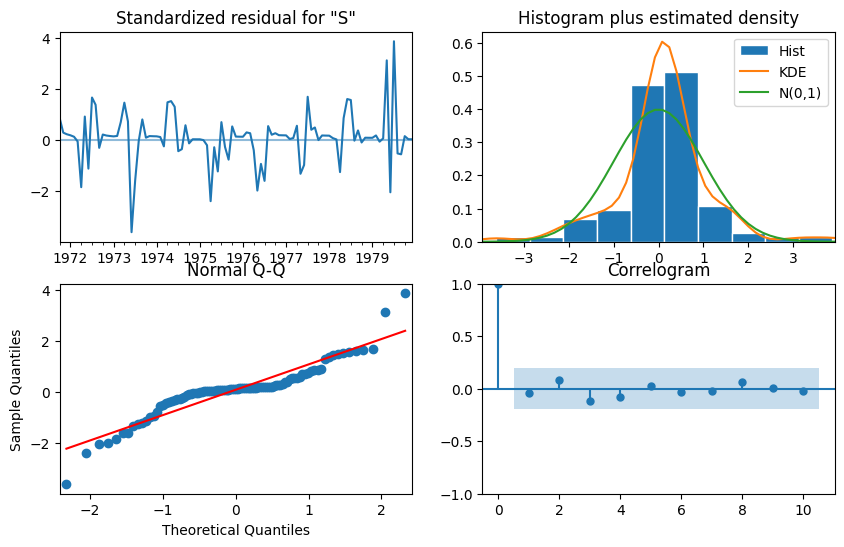

In [31]:
sarima.plot_diagnostics(figsize=(10,6));

PREVISÕES FUTURAS - FORECAST

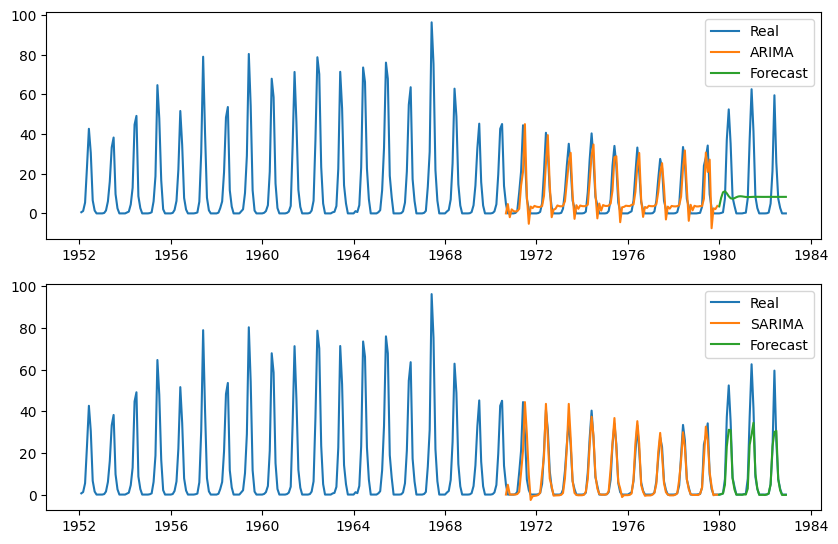

In [32]:
# Fazer previsões para os próximos 'n' períodos
n = 36  # Defina o número de períodos futuros para prever
forecastArima = arima.forecast(steps=n)
forecastSarima = sarima.forecast(steps=n)

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # (linhas, colunas, índice)
plt.plot(df0.SeaTrout, label='Real')
plt.plot(arima.predict(typ='levels'), label="ARIMA")
plt.plot(forecastArima, label="Forecast")
plt.legend()                

plt.subplot(3, 1, 2)  # (linhas, colunas, índice)
plt.plot(df0.SeaTrout, label='Real')
plt.plot(sarima.predict(typ='levels'), label="SARIMA")
plt.plot(forecastSarima, label="Forecast")
plt.legend()   

#plt.subplot(3, 1, 3)  # (linhas, colunas, índice)

plt.legend()                  

OUTRAS CORRELAÇÕES

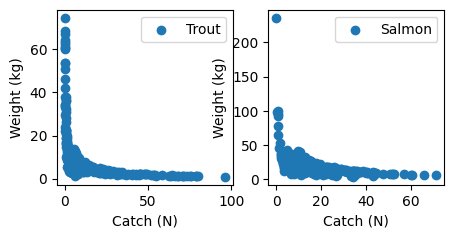

In [33]:
plt.figure(figsize=(5, 5))

# Primeiro subplot
plt.subplot(2, 2, 1)  # (linhas, colunas, índice)
troutW = df['SeaTroutWeight']/df['SeaTrout']
plt.scatter(df['SeaTrout'],troutW,  label='Trout')
plt.xlabel('Catch (N)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.subplot(2, 2, 2)  # (linhas, colunas, índice)
salmonW = df['SalmonWeight']/df['Salmon']
plt.scatter(df['Salmon'],salmonW, label='Salmon')
plt.xlabel('Catch (N)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.show()

In [34]:
df1 = df1[['Salmon','SalmonWeight','SeaTrout','SeaTroutWeight','Farmed']]
df1

,Salmon,SalmonWeight,SeaTrout,SeaTroutWeight,Farmed
Datas,,,,,
1952-02-01,26.733,145.730283,0.598,9.544724,0.0
1952-03-01,24.493,184.315819,1.219,23.048463,0.0
1952-04-01,34.886,290.013496,5.460,42.206117,0.0
1952-05-01,41.166,392.583903,23.067,77.572104,0.0
1952-06-01,36.096,423.018922,42.653,80.644748,0.0
...,...,...,...,...,...
2022-05-01,0.059,14.500144,0.206,7.871677,0.0
2022-06-01,0.194,16.881553,0.599,8.536784,0.0
2022-07-01,0.246,18.965385,0.322,8.999110,0.0


Como a sazonalidade das outras variáveis afetam a sazonalidade da Truta e do Salmão

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


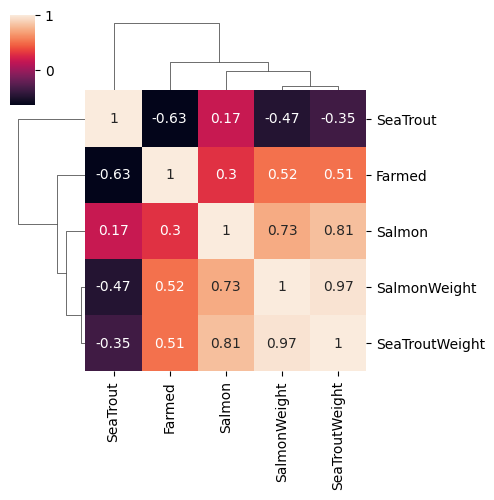

In [35]:
import statsmodels.api as sm
from matplotlib import rcParams

seasonality_dict = {}

seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(df1[ts], period=12).seasonal for ts in df1.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True, figsize=(5, 5))


Correlação da TENDÊNCIA

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


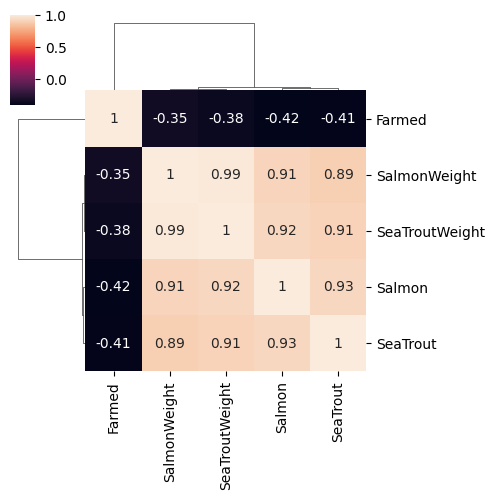

In [36]:
trend_dict = {}
trend_dict = {
    ts: sm.tsa.seasonal_decompose(df1[ts], period=12).trend for ts in df1.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True, figsize=(5, 5))
plt.show();